In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("airline_passengers.csv")

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


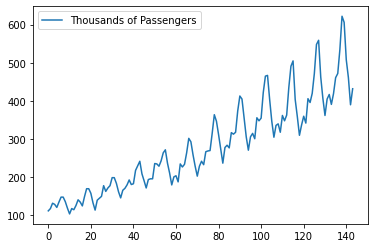

In [5]:
#plotting
df.plot()

In [6]:
#renaming columns
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.isnull()

,ds,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
140,False,False
141,False,False
142,False,False
143,False,False


In [8]:
#removing nan value
df.drop(144, axis=0, inplace=True)


In [9]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df.dtypes

ds     object
y     float64
dtype: object

In [11]:
#ds is object type so converting it to date format
df['ds']= pd.to_datetime(df['ds'])


In [12]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [13]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [14]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [15]:
from fbprophet import Prophet

In [16]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [17]:
##initialise the model
model= Prophet()

In [18]:
df.columns

Index(['ds', 'y'], dtype='object')

In [19]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
#checking yearly seasonality
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [21]:
#creating future dates of 365 days 

future_dates= model.make_future_dataframe(periods=365)

In [22]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [23]:
prediction= model.predict(future_dates)

In [24]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,56.639519,113.841004,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,49.268103,107.927739,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,79.856355,139.606387,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,78.969427,136.228605,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,83.893605,140.878193,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


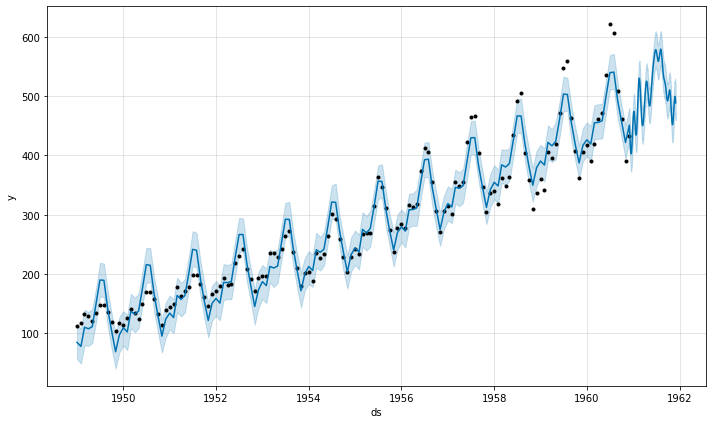

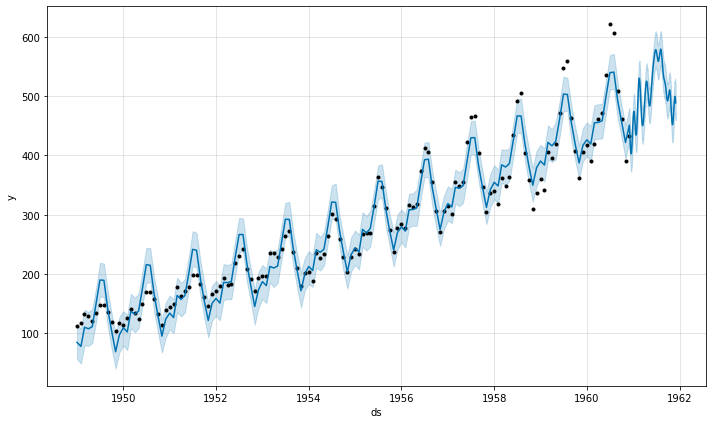

In [25]:
#plot the prediction
model.plot(prediction)

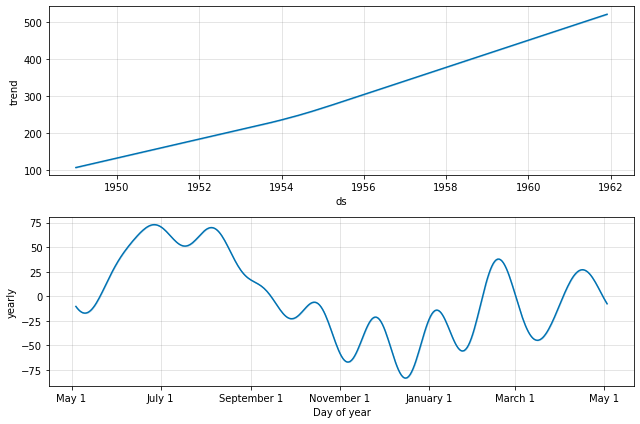

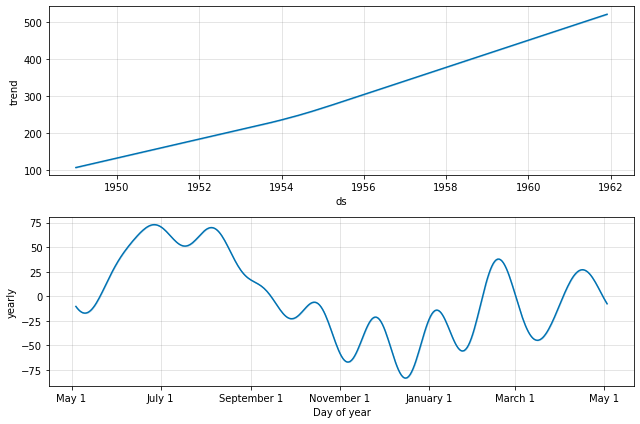

In [26]:
model.plot_components(prediction,  uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=1949, figsize=None)

In [27]:
#in time series analyis , cross validation 
#1960-1962

#cross validation is like
#1960-61 -- train dataset
#1961-62 -- test dataset
#1962-63 -- validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_crossval= cross_validation(model, initial='730 days', period= '180 days', horizon='365 days')

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
df_crossval.head()
#yhat is predicted and y is the actual value

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance= performance_metrics(df_crossval)


In [ ]:
df_performance

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig= plot_cross_validation_metric(df_crossval, metric='rmse')

In [ ]:
from fbprophet.plot import plot_forecast_component
fig= plot_cross_validation_metric(df_crossval, metric='rmse')

In [ ]:
from fbprophet.plot import plot_forecast_component_plotly
fig= plot_cross_validation_metric(df_crossval, metric='mse')